In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [3]:
idir='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTestTRD/'

In [4]:
fP=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dian_T*.nc')[0])

In [5]:
fP.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'NITR', 'NO3RAD', 'ATF_NO3', 'SMS_NO3', 'RDB_NO3', 'RDN_NO3', 'REM_PON', 'REM_DON', 'REM_NO3', 'REM_bSi'])

In [6]:
fP.variables['REM_DON']

<class 'netCDF4._netCDF4.Variable'>
float32 REM_DON(time_counter, deptht, y, x)
    long_name: ---
    units: ---
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 d
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (5, 40, 898, 398)
filling on

In [7]:
np.max(np.ma.masked_where(tmask==0,fP.variables['SMS_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['SMS_NO3'][0,:,:,:]))

(9.366569, -23.560404)

In [8]:
np.max(np.ma.masked_where(tmask==0,fP.variables['ATF_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['ATF_NO3'][0,:,:,:]))

(1.4866695, -2.6189249)

In [9]:
np.max(np.ma.masked_where(tmask==0,fP.variables['RDB_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['RDB_NO3'][0,:,:,:]))

(0.0, 0.0)

In [10]:
np.max(np.ma.masked_where(tmask==0,fP.variables['RDN_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['RDN_NO3'][0,:,:,:]))

(0.0, 0.0)

In [11]:
np.max(np.ma.masked_where(tmask==0,fP.variables['NO3RAD'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['NO3RAD'][0,:,:,:]))

(0.0, 0.0)

In [12]:
np.max(np.ma.masked_where(tmask==0,fP.variables['REM_DON'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['REM_DON'][0,:,:,:]))

(-0.0, -9.764514)

In [13]:
np.max(np.ma.masked_where(tmask==0,fP.variables['REM_bSi'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['REM_bSi'][0,:,:,:]))

(-0.0, -44.278637)

In [14]:
np.max(np.ma.masked_where(tmask==0,fP.variables['REM_PON'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['REM_PON'][0,:,:,:]))

(-0.0, -5.797069)

In [15]:
np.max(np.ma.masked_where(tmask==0,fP.variables['SMS_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['SMS_NO3'][0,:,:,:]))

(9.366569, -23.560404)

In [16]:
np.max(fP.variables['NITR'][0,0,:,:]-fP.variables['REM_NO3'][0,0,:,:]),np.min(fP.variables['NITR'][0,0,:,:]-fP.variables['REM_NO3'][0,0,:,:])

(0.0, 0.0)

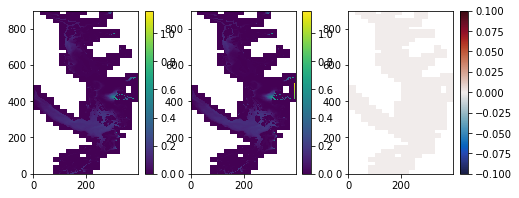

In [17]:
fig,ax=plt.subplots(1,3,figsize=(8,3))
m0=ax[0].pcolormesh(fP.variables['NITR'][0,0,:,:])
plt.colorbar(m0,ax=ax[0])
m1=ax[1].pcolormesh(fP.variables['REM_NO3'][0,0,:,:])
plt.colorbar(m1,ax=ax[1])
m2=ax[2].pcolormesh(fP.variables['NITR'][0,0,:,:]-fP.variables['REM_NO3'][0,0,:,:],cmap=cmocean.cm.balance)
plt.colorbar(m2,ax=ax[2])

In [6]:
fS=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Sutil_V*.nc')[0])
fS.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'NO3TVDY', 'ATY_NO3', 'ATY_PHY', 'DTY_NO3', 'DTY_PHY', 'LDF_NO3', 'VLDFNO3'])

In [18]:
fS=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Sutil_V*.nc')[0])
fS.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'NO3TVDY', 'ATY_NO3', 'LDF_NO3', 'VLDFNO3'])

In [8]:
np.max(fS.variables['LDF_NO3'][0,:,:,:]),np.min(fS.variables['LDF_NO3'][0,:,:,:])

(11.247603, -16.783497)

In [19]:
fS.variables['ATY_NO3']

<class 'netCDF4._netCDF4.Variable'>
float32 ATY_NO3(time_counter, depthv, y, x)
    long_name: ---
    units: ---
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 d
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (5, 40, 1, 26)
filling on

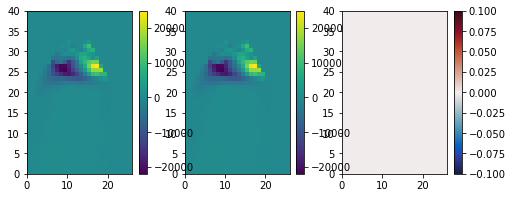

In [20]:
fig,ax=plt.subplots(1,3,figsize=(8,3))
m0=ax[0].pcolormesh(fS.variables['NO3TVDY'][0,:,0,:])
plt.colorbar(m0,ax=ax[0])
m1=ax[1].pcolormesh(fS.variables['ATY_NO3'][0,:,0,:])
plt.colorbar(m1,ax=ax[1])
m2=ax[2].pcolormesh(fS.variables['NO3TVDY'][0,:,0,:]-fS.variables['ATY_NO3'][0,:,0,:],cmap=cmocean.cm.balance)
plt.colorbar(m2,ax=ax[2])

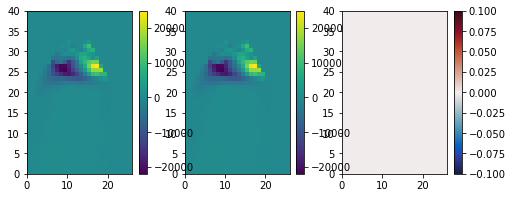

In [20]:
fig,ax=plt.subplots(1,3,figsize=(8,3))
m0=ax[0].pcolormesh(fS.variables['NO3TVDY'][0,:,0,:])
plt.colorbar(m0,ax=ax[0])
m1=ax[1].pcolormesh(fS.variables['ATY_NO3'][0,:,0,:])
plt.colorbar(m1,ax=ax[1])
m2=ax[2].pcolormesh(fS.variables['NO3TVDY'][0,:,0,:]-fS.variables['ATY_NO3'][0,:,0,:],cmap=cmocean.cm.balance)
plt.colorbar(m2,ax=ax[2])